In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA


In [29]:
%%html
<div>
    <img src="https://i.imgur.com/Q5IhUpF.gif">
</div>

In [30]:
df1 = pd.read_csv(r"Mumbai.csv")
df2 = pd.read_csv(r"Bangalore.csv")
df3 = pd.read_csv(r"Delhi.csv")
df4 = pd.read_csv(r"Hyderabad.csv")


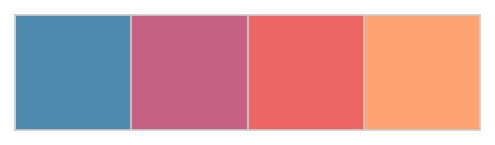

In [31]:
custom_colors = ["#4e89ae","#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis= "both", labelsize=0, length= 0)


# MUMBAI

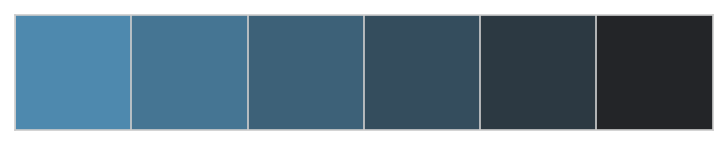

In [32]:
mumbai = sns.dark_palette(custom_colors[0], reverse = True)
sns.palplot(sns.color_palette(mumbai),size =1)
plt.tick_params(axis = 'both', labelsize=0, length=0)

# BANGALORE

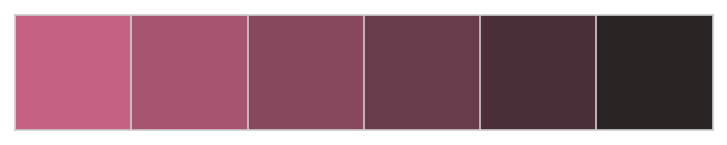

In [33]:
bangalore = sns.dark_palette(custom_colors[1], reverse = True)
sns.palplot(sns.color_palette(bangalore),size =1)
plt.tick_params(axis = 'both', labelsize=0, length=0)


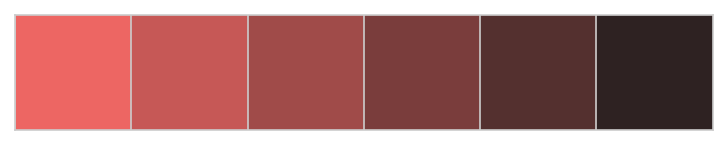

In [34]:
delhi = sns.dark_palette(custom_colors[2], reverse = True)
sns.palplot(sns.color_palette(delhi),size =1)
plt.tick_params(axis='both',labelsize=0,length=0)


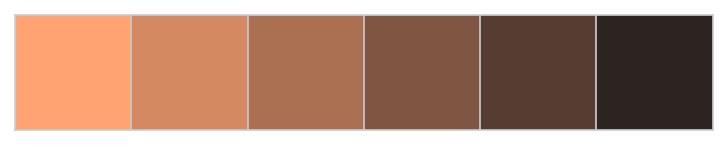

In [35]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad), size=1)
plt.tick_params(axis='both', labelsize=0, length=0)


In [36]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9,np.nan, inplace=True)
df3.replace(9,np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)


In [37]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

In [38]:
print(f"{y_}Mumbai:{r_}{df1.shape}\n")
print(f"{y_}Delhi:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")

Mumbai:(1398, 40)

Delhi:(1951, 40)

Chennai:(2002, 40)

Hyderabad:(2434, 40)



In [39]:
print(f"{y_}Data types of data columns: \n{m_}{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

In [40]:
#Modifying the Price in lakhs(INR)
df1['Price'] = df1['Price'] / 100000
df2['Price'] = df2['Price'] / 100000
df3['Price'] = df3['Price'] / 100000
df4['Price'] = df4['Price'] / 100000

In [41]:
df1.head(7)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,48.5,720,Kharghar,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,600,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,650,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45.0,650,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50.0,665,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,170.0,2000,Kharghar,4,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,125.0,1550,Kharghar,3,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1540aac10>,
 'caps': [<matplotlib.lines.Line2D at 0x154066a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x143846d50>],
 'medians': [<matplotlib.lines.Line2D at 0x154065550>],
 'fliers': [<matplotlib.lines.Line2D at 0x153fcd9d0>],
 'means': []}

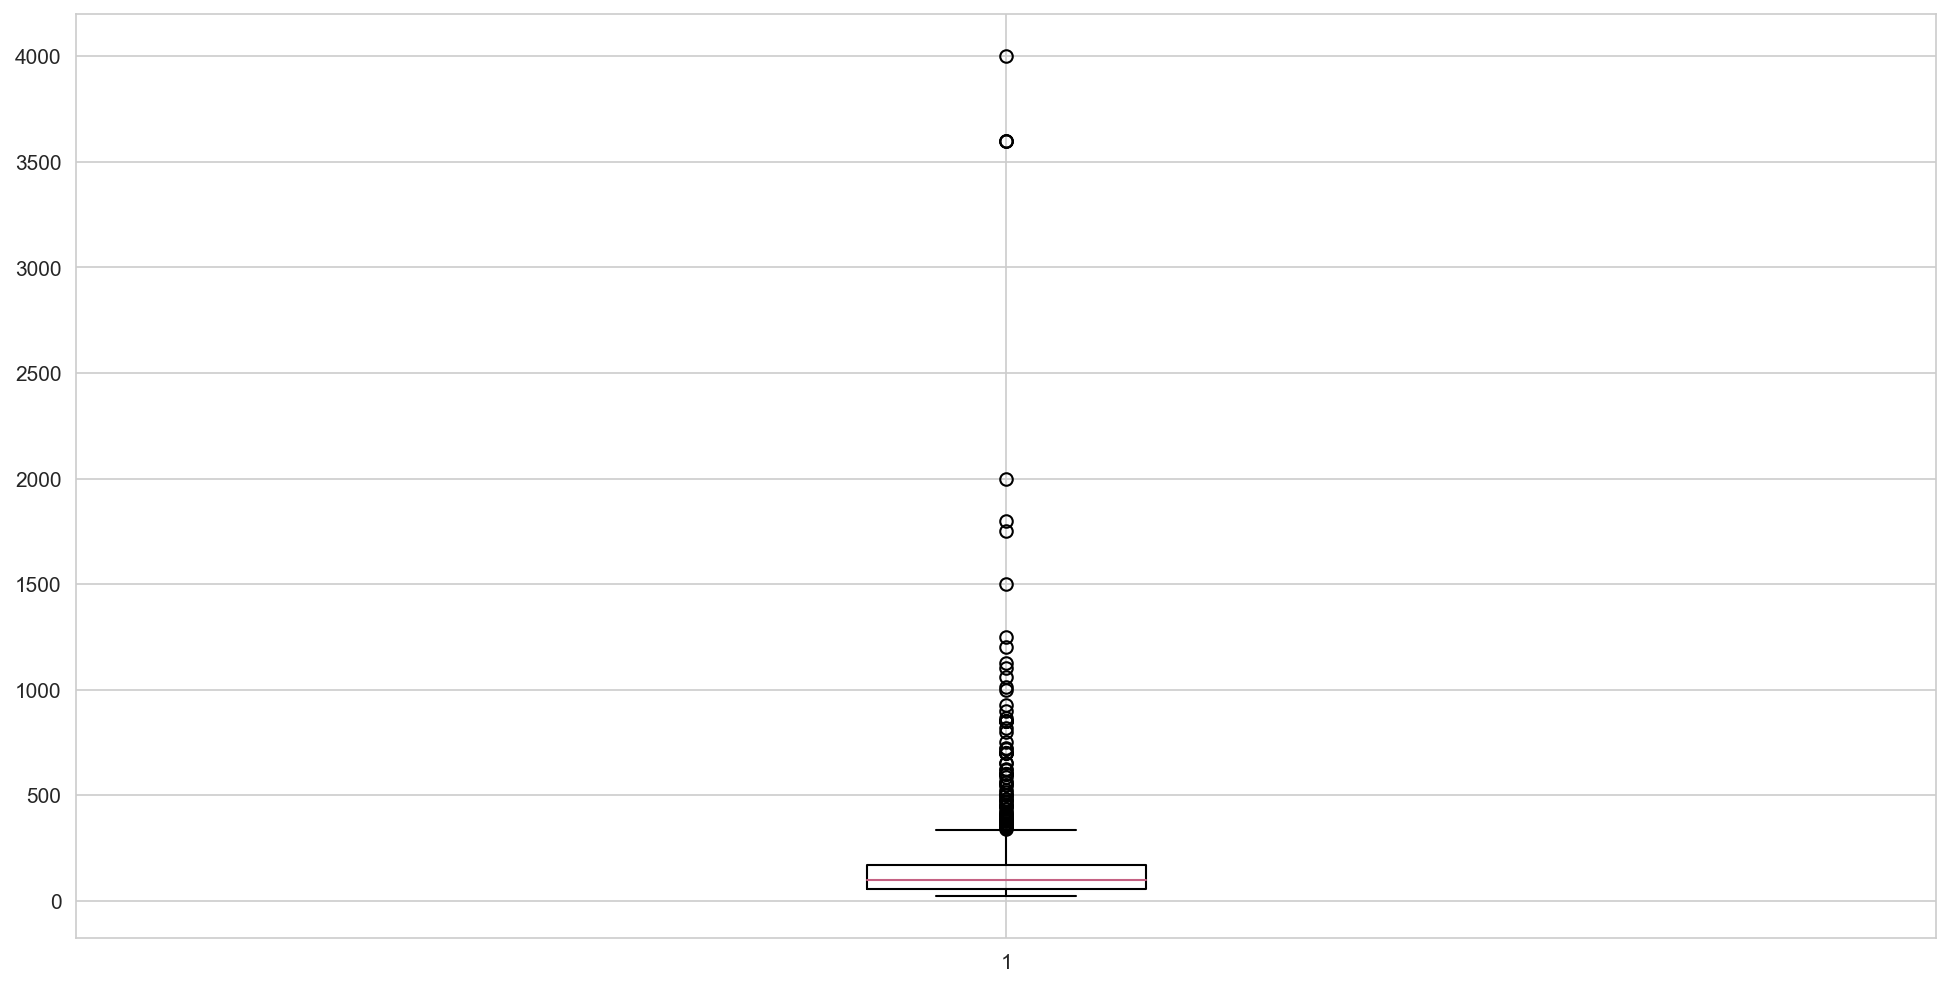

In [42]:
plt.boxplot(df1["Price"])

In [43]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='Ana')

def feature_generation(df):
    lat=[]
    long=[]
    a=0
    for i in df['Location']: 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            print(a)
        except:
            lat.append("NA")
            long.append("NA")
        a=a+1
    df['Latitude'] = lat
    df['Longitude'] = long 

In [44]:
df1.to_csv('Mumbai_updated.csv')
df2.to_csv('Bangalore_updated.csv')
df3.to_csv('Delhi_updated.csv')
df4.to_csv('Hyderabad_updated.csv')

In [45]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')
Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter'

In [46]:
sns.set_style("whitegrid")

In [47]:
import seaborn as sns
sns.set_theme()


def triple_plot(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10),sharex=True)
#     sns.histplot(x, ax=ax[0],color=c)
#     ax[0].set(xlabel=None)
#     ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Boxplot')
    sns.violinplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


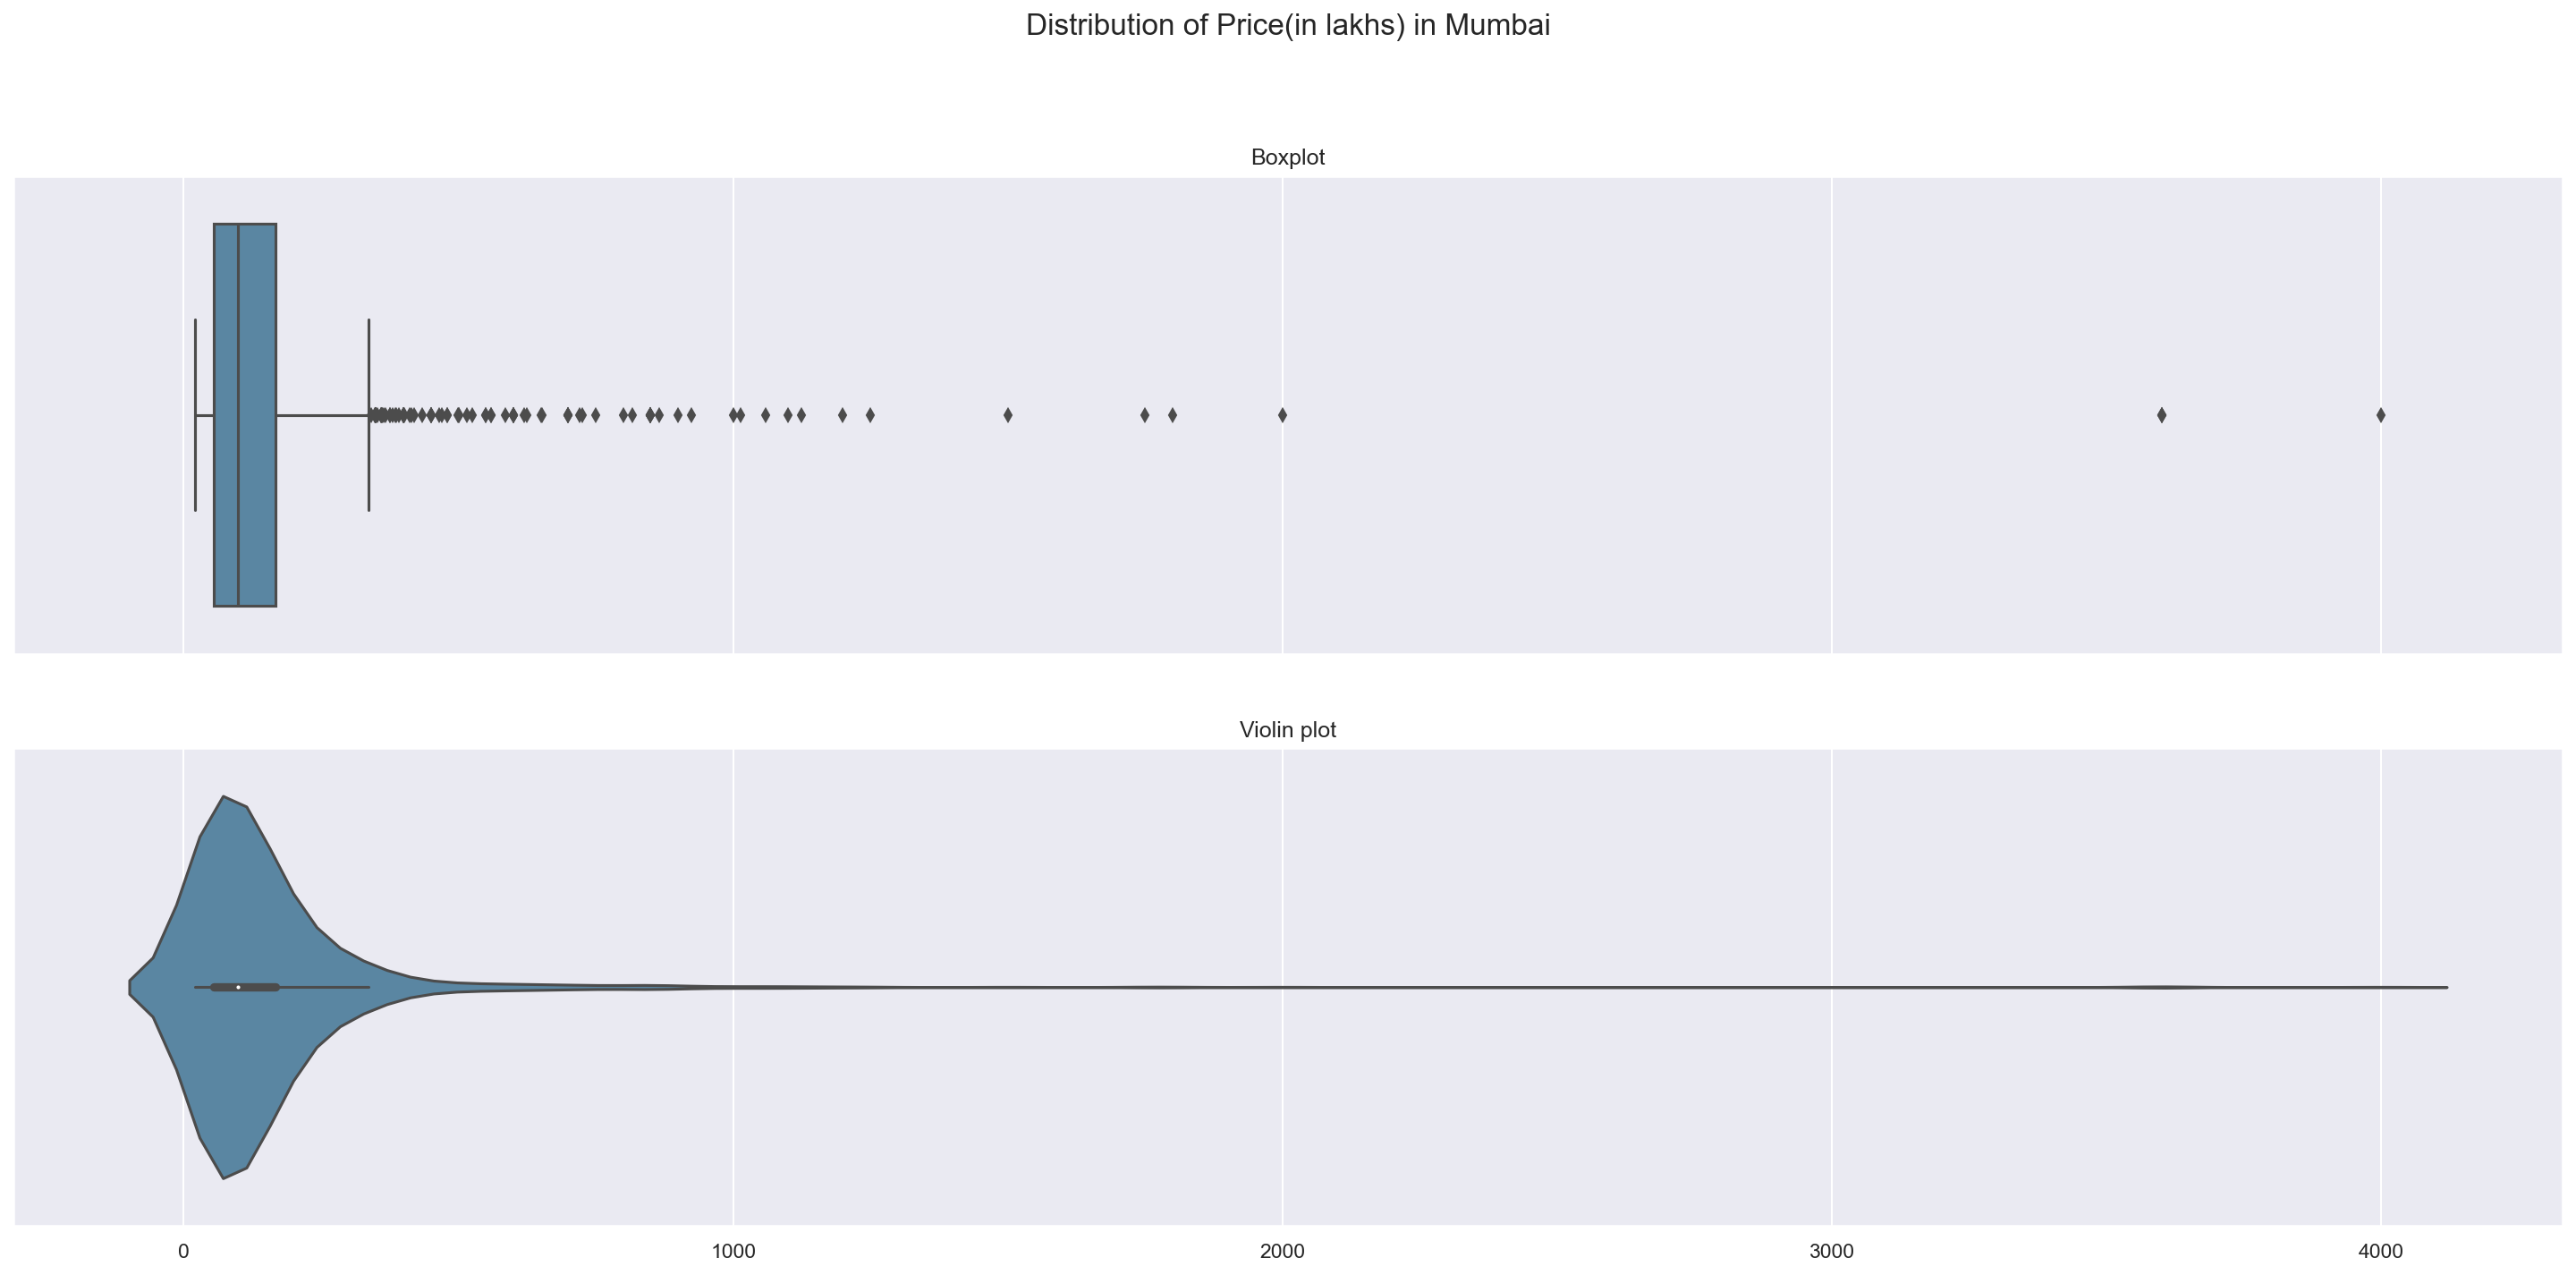

In [48]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


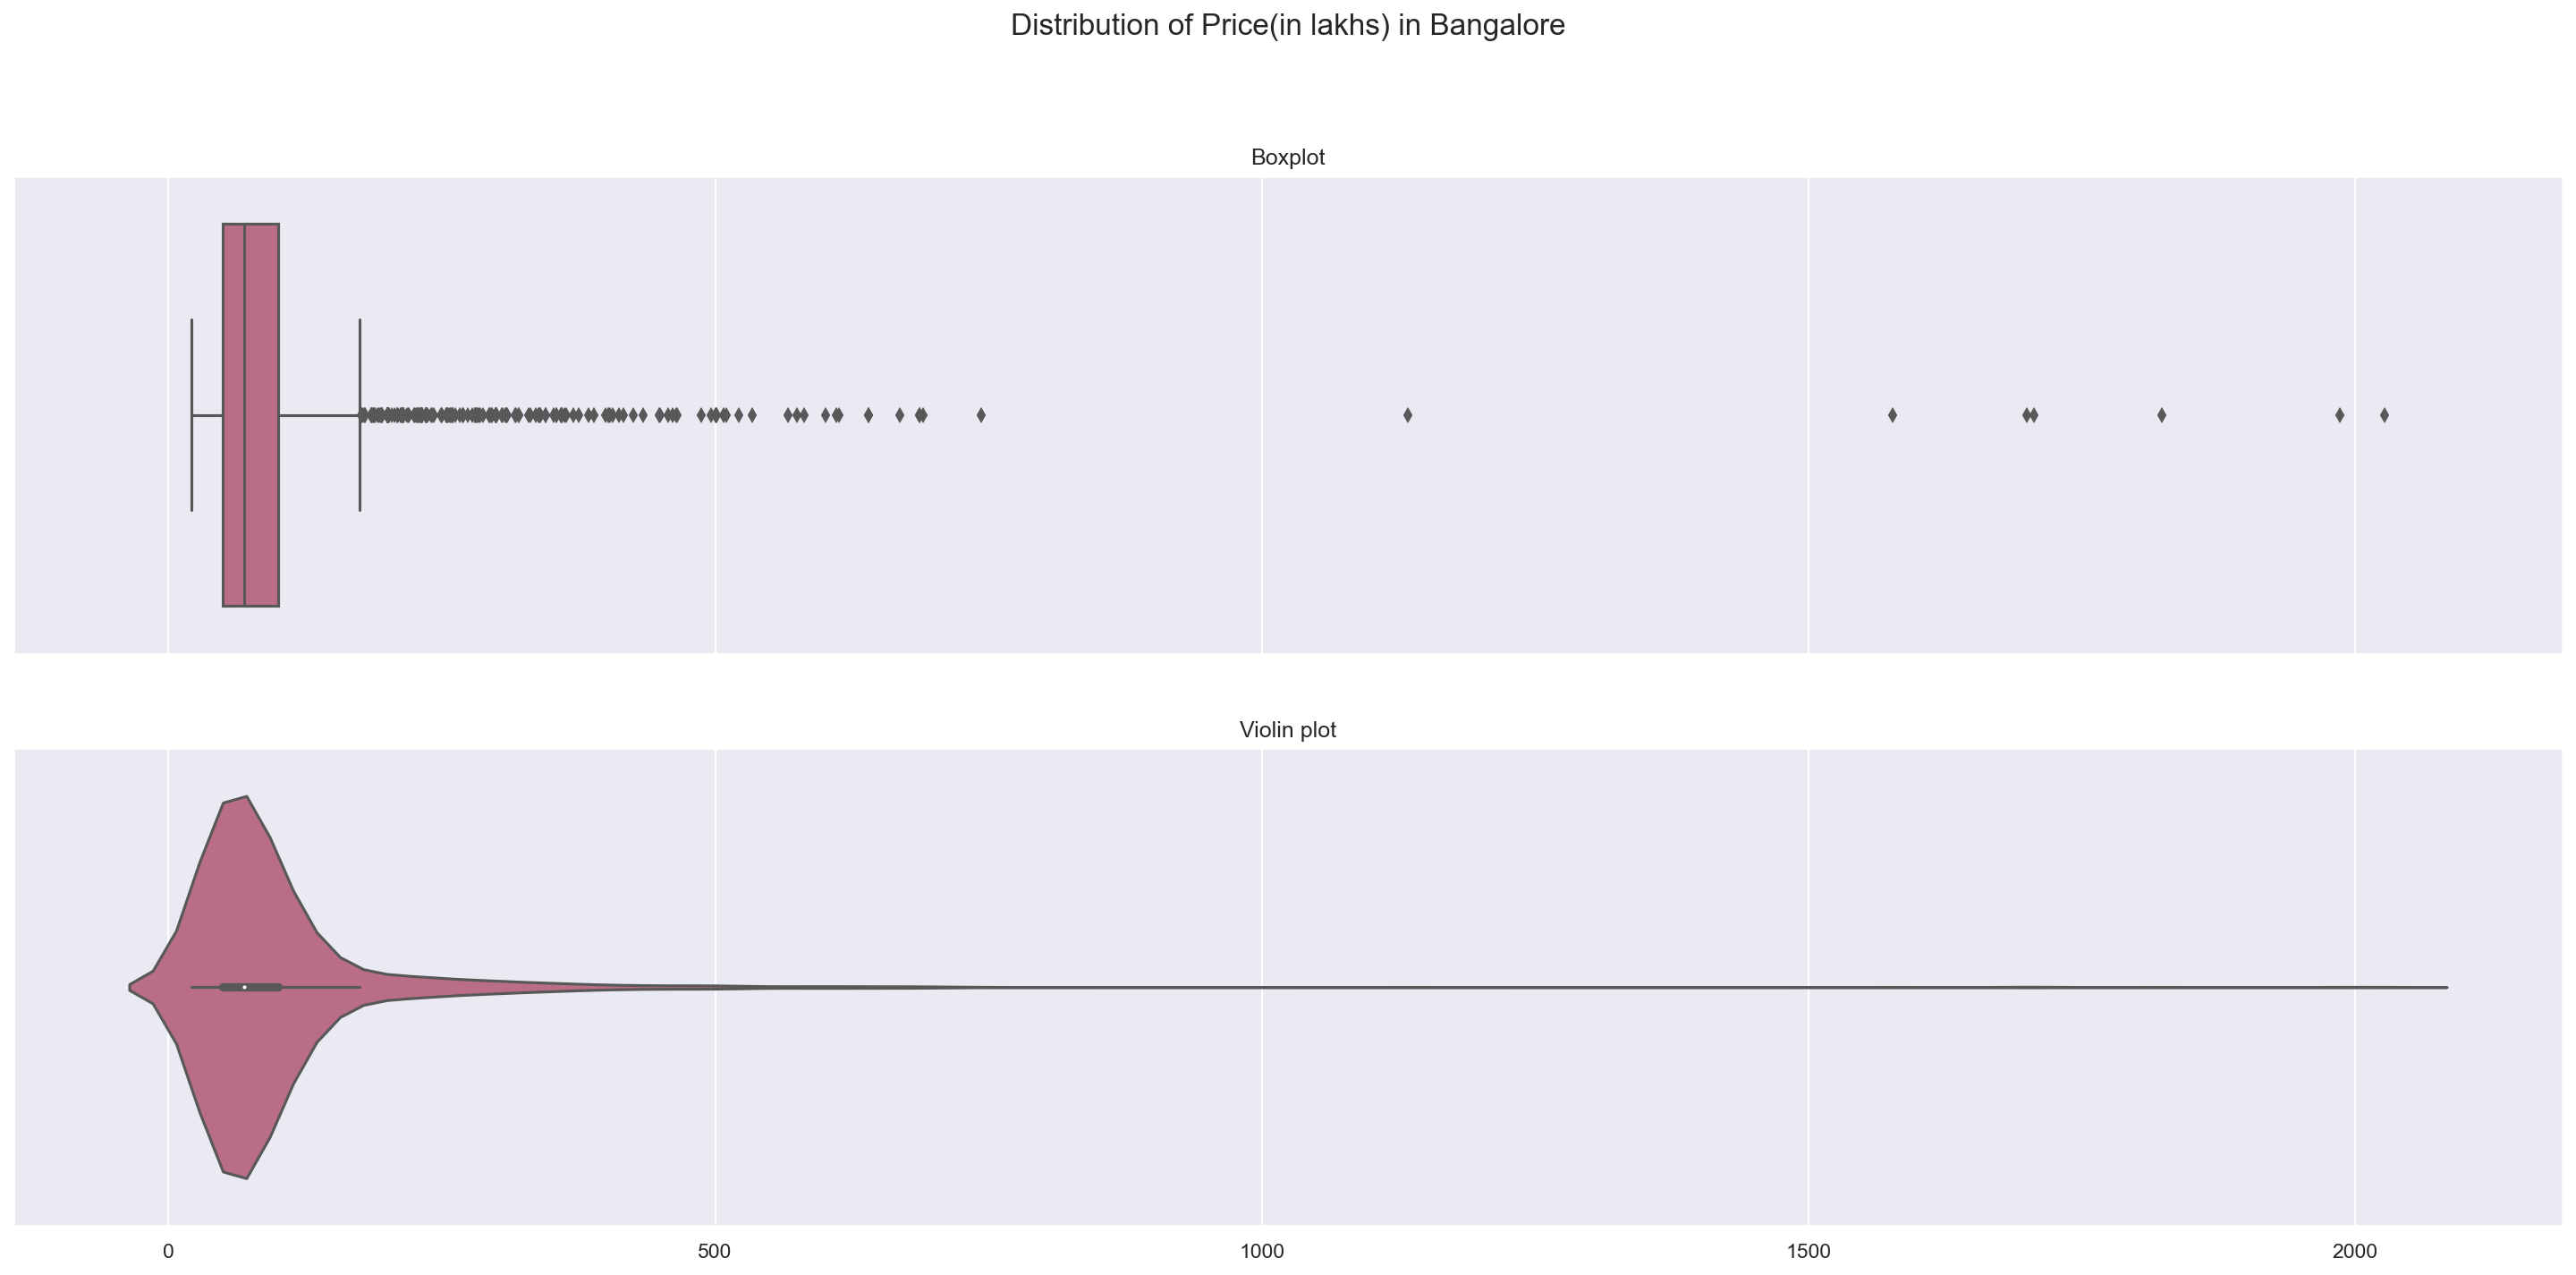

In [49]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Bangalore',custom_colors[1])

In [50]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0] #new properties
    df6=data[data['Resale']== 1] # resale properties
    fig, ax = plt.subplots(1,2,figsize=(15, 10)) #1 rows and 2 columns ie. two plots side by side
    # ax[0] and ax[1] ax is the variable followed by a tuple are the two subplots having new and resale properties
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p) # top 10 location in desc
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

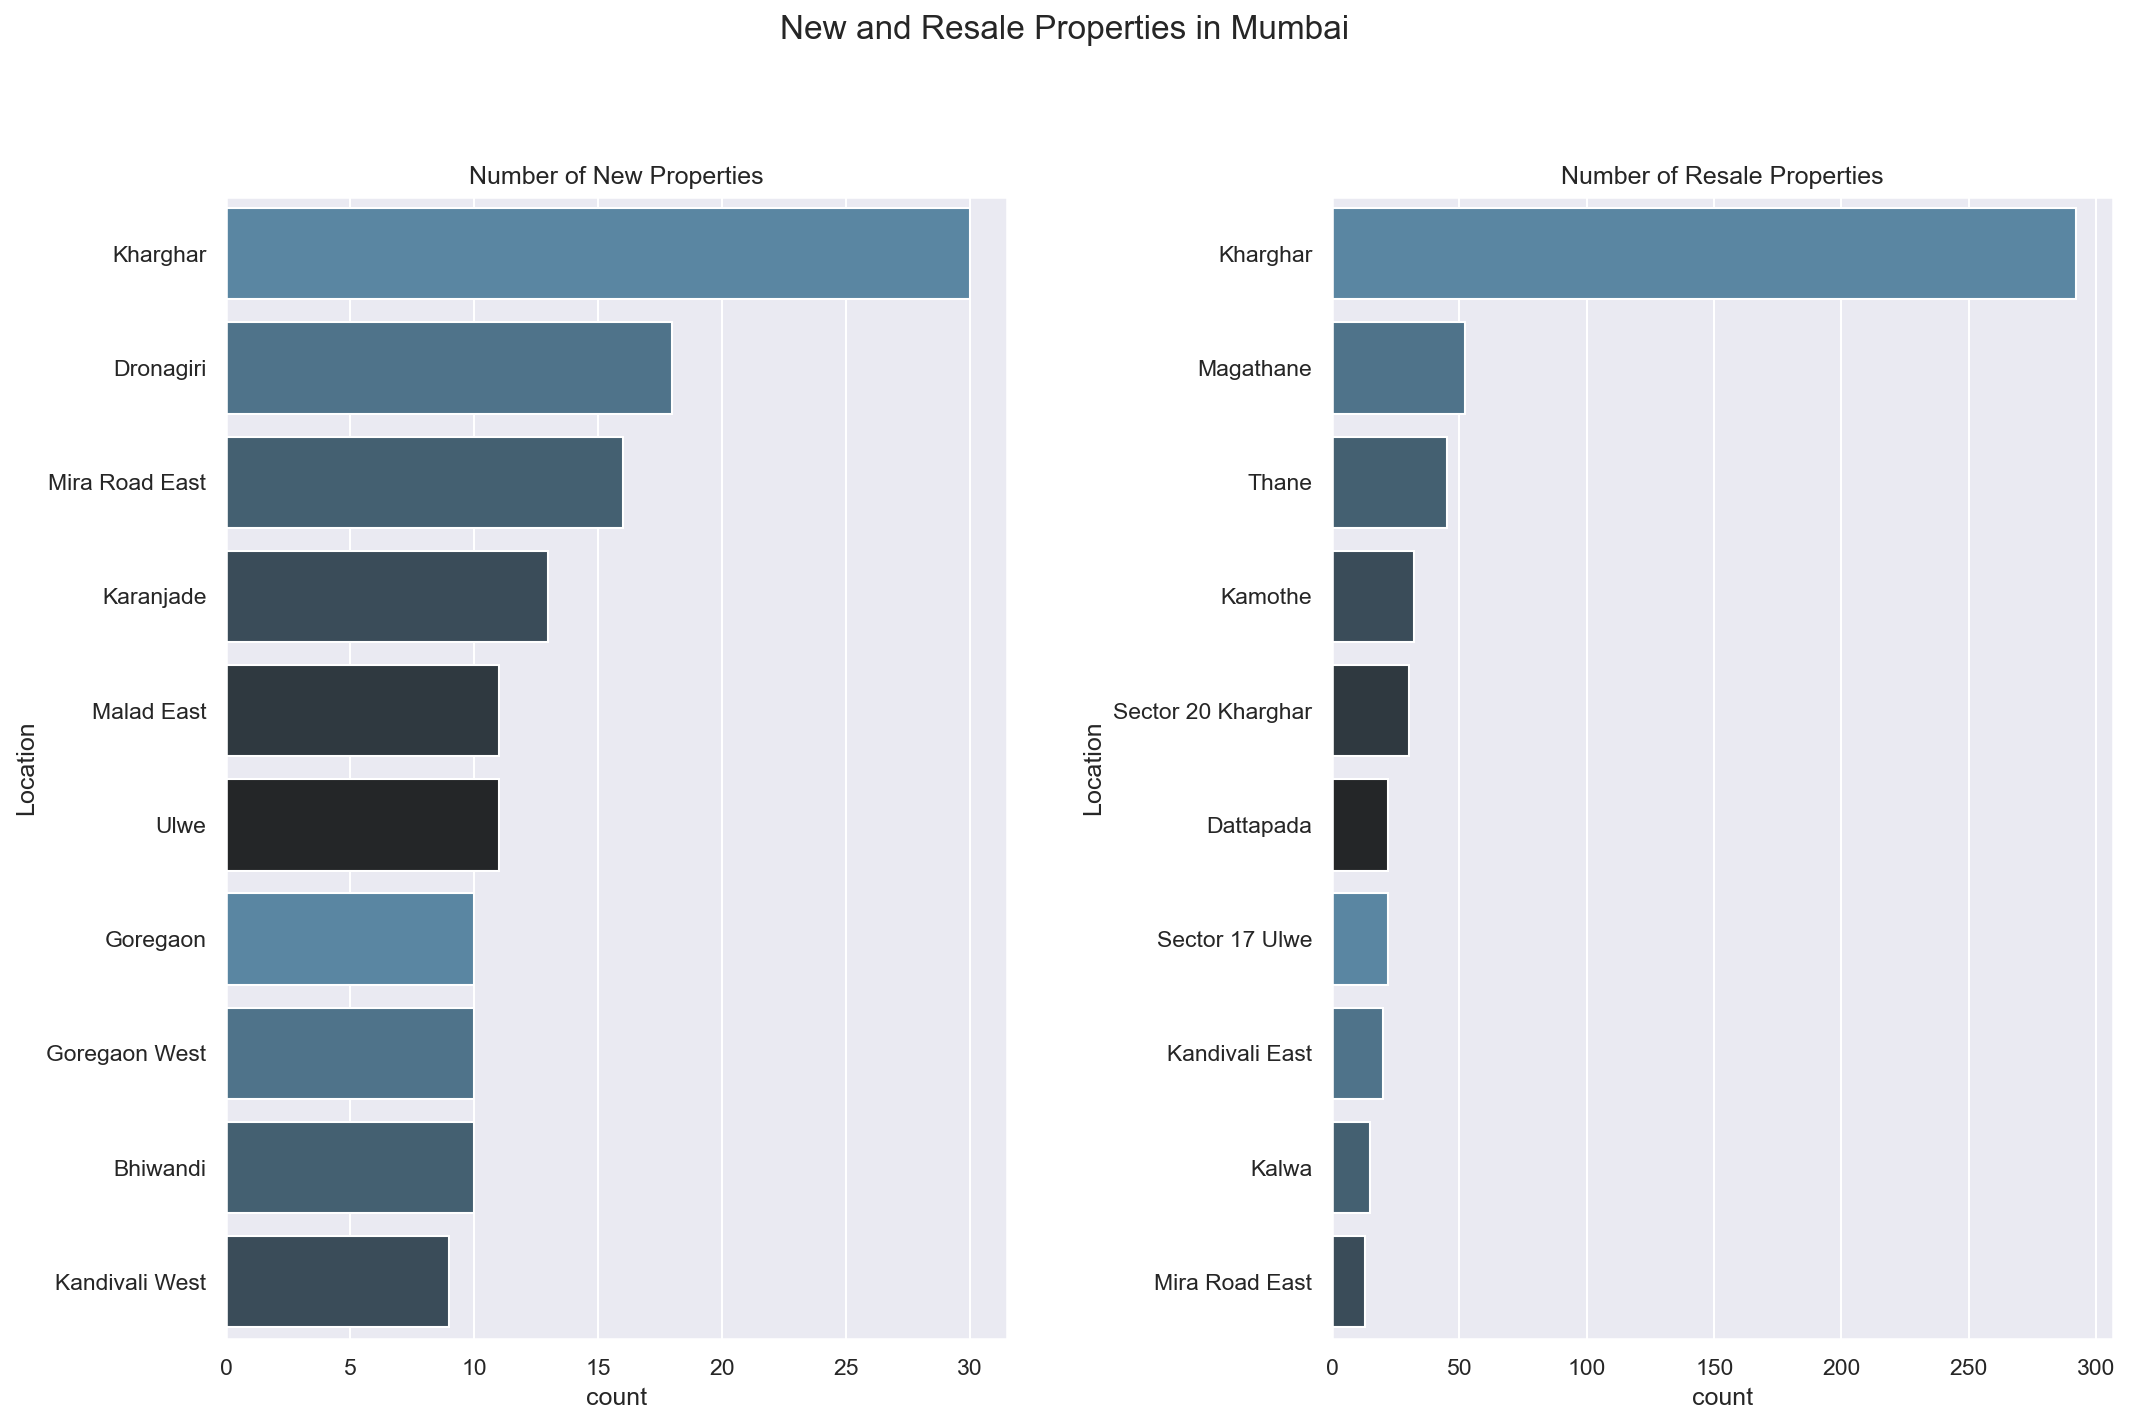

In [51]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

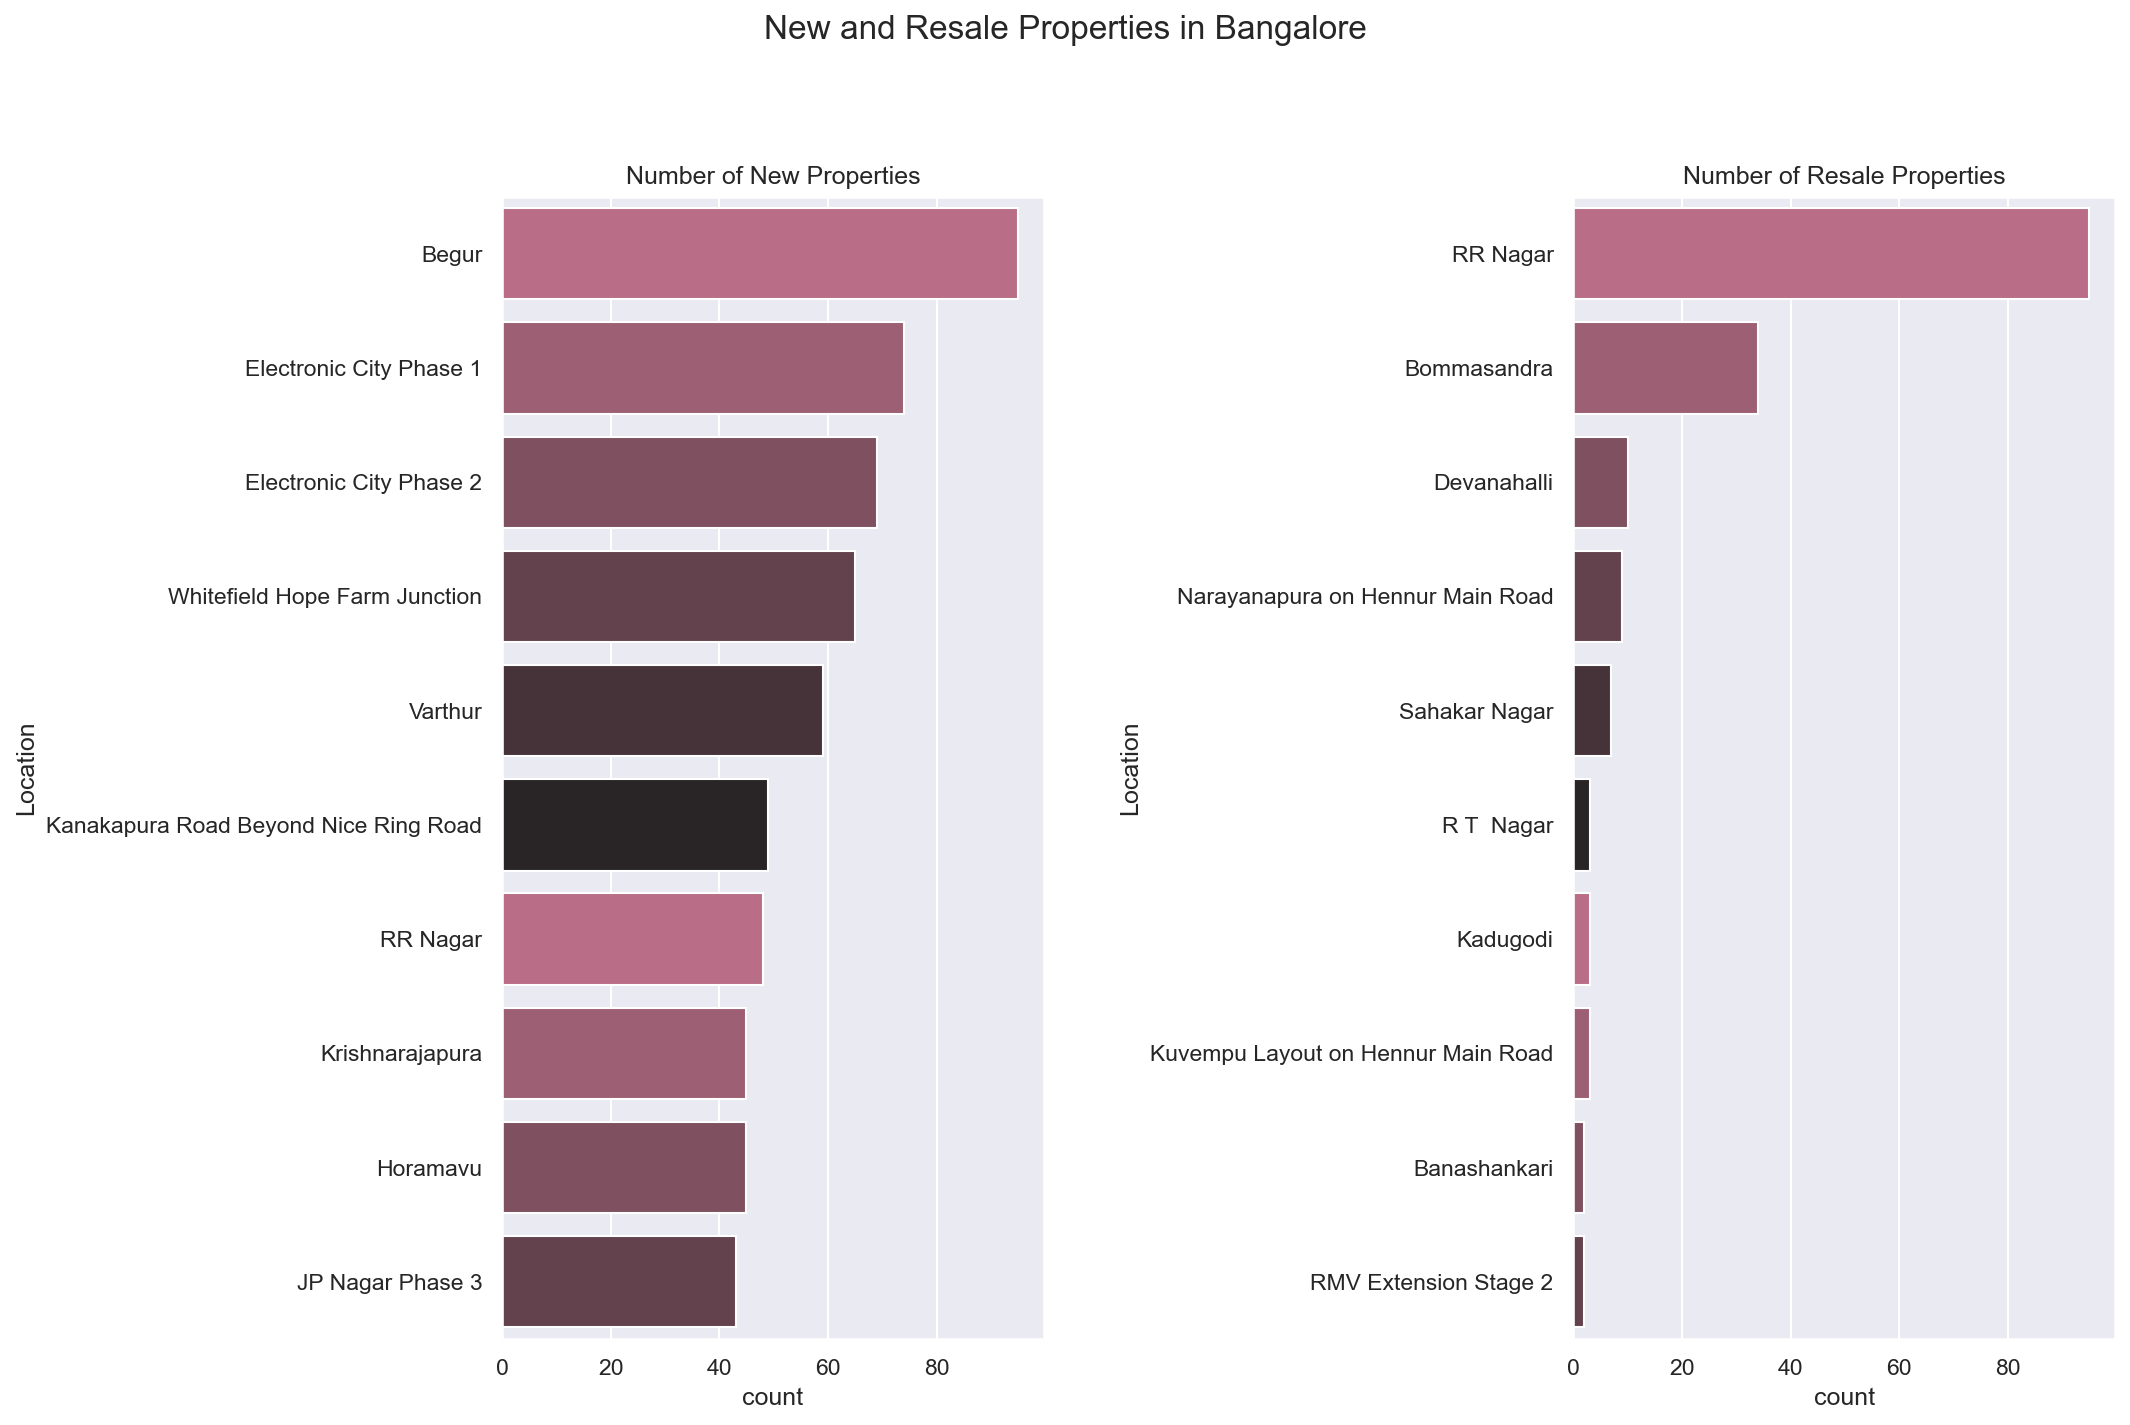

In [52]:

count_plot(df2,'New and Resale Properties in Bangalore',bangalore)

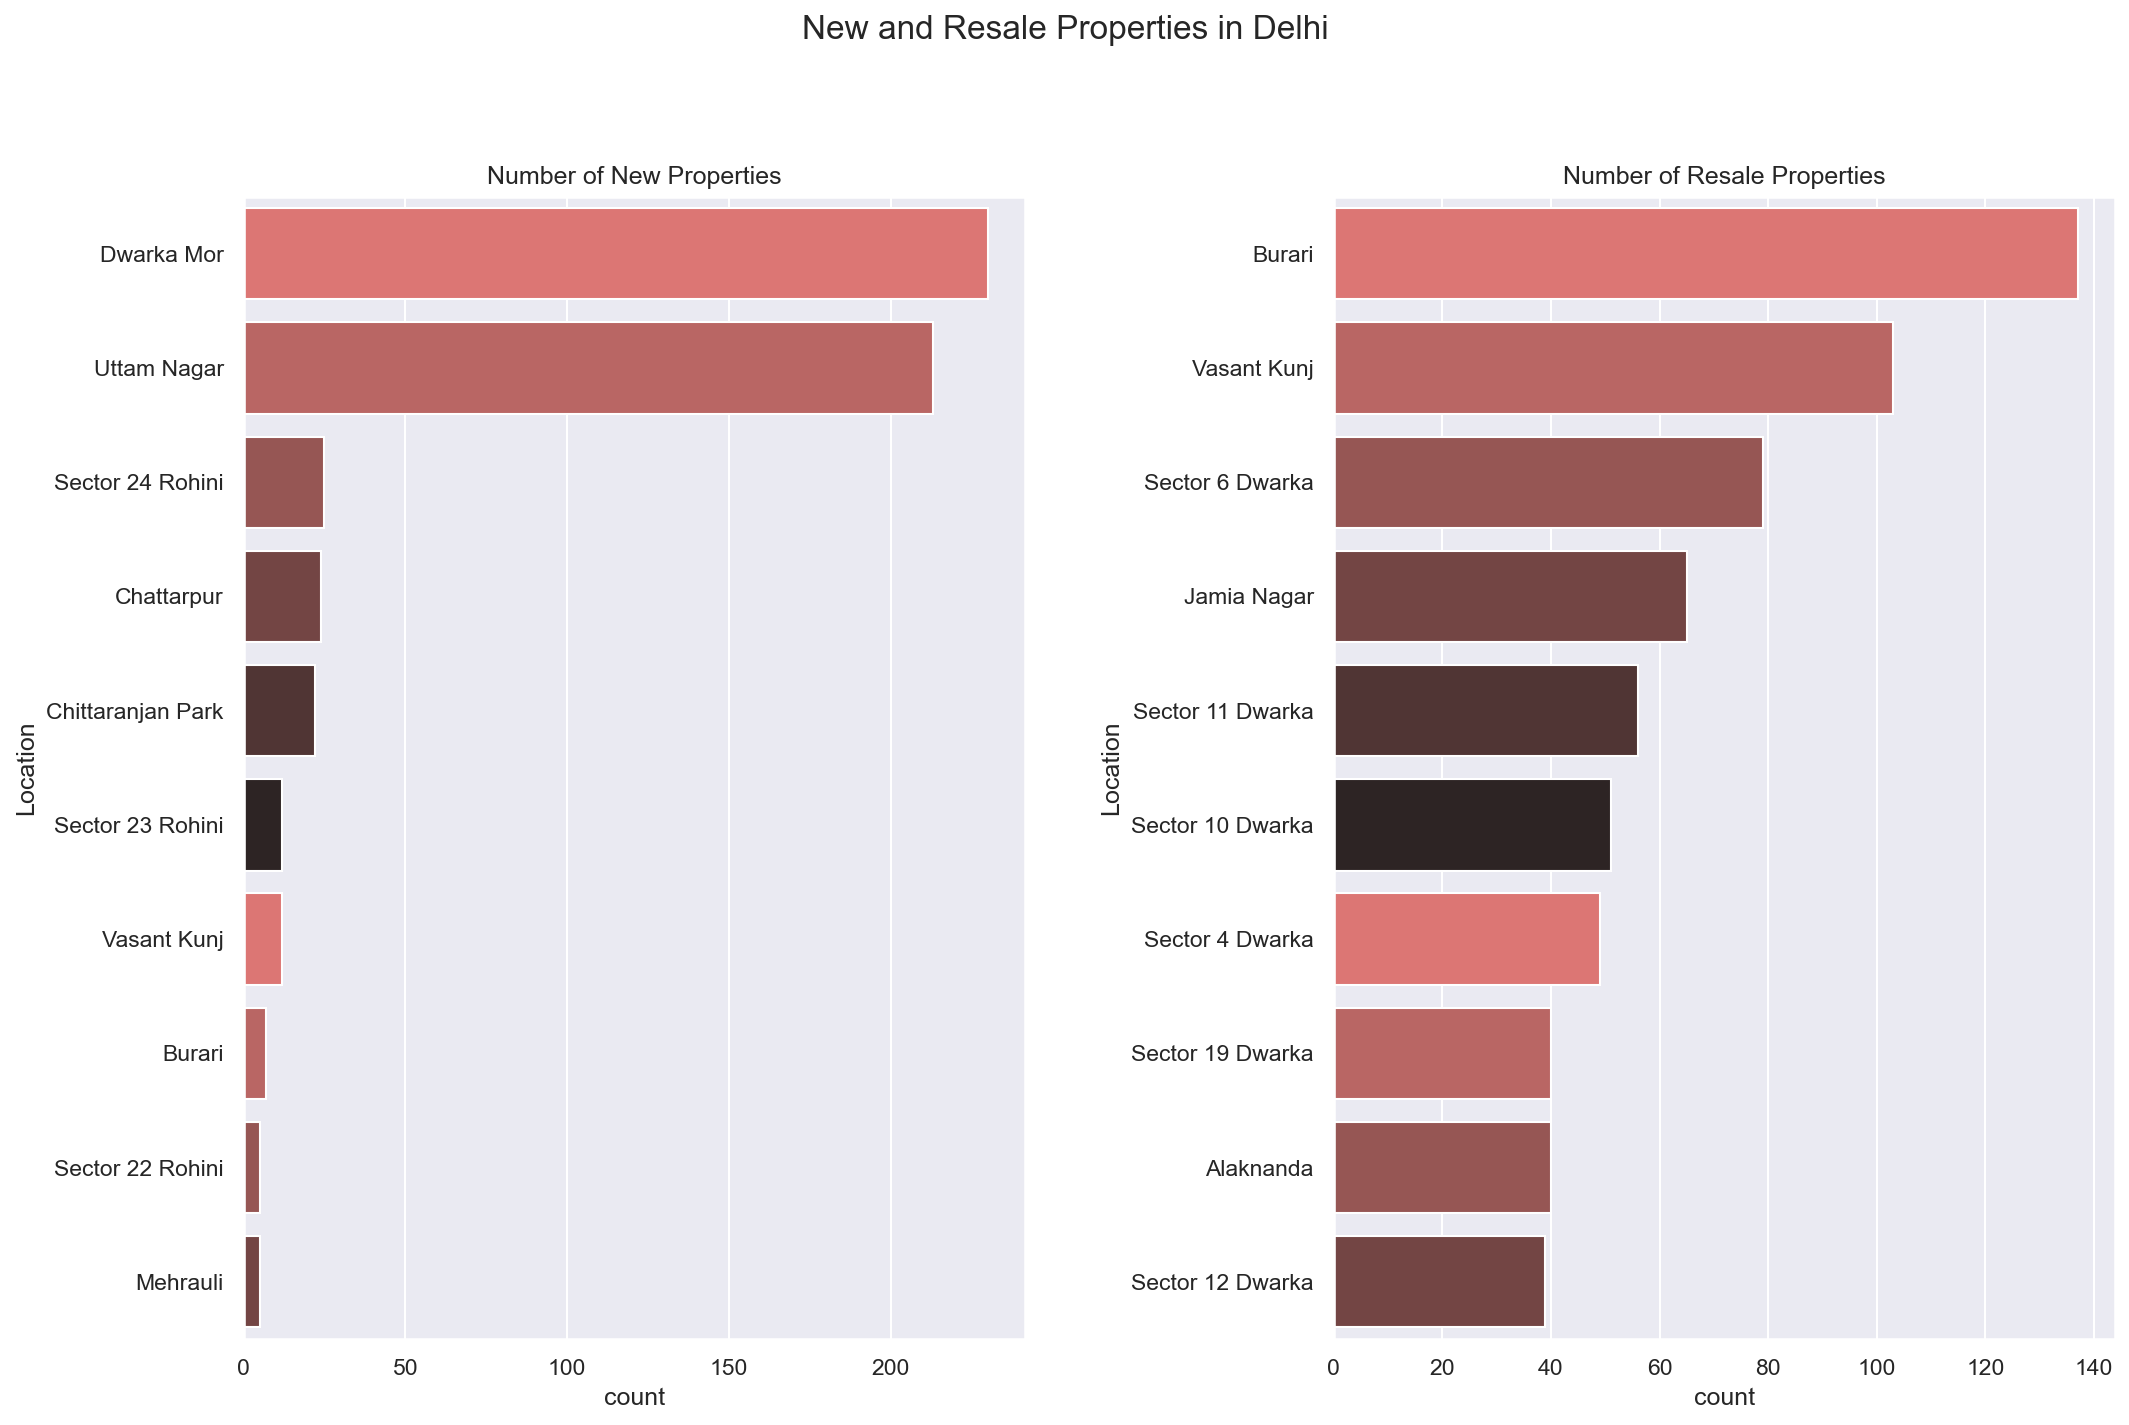

In [53]:
count_plot(df3,'New and Resale Properties in Delhi',delhi)

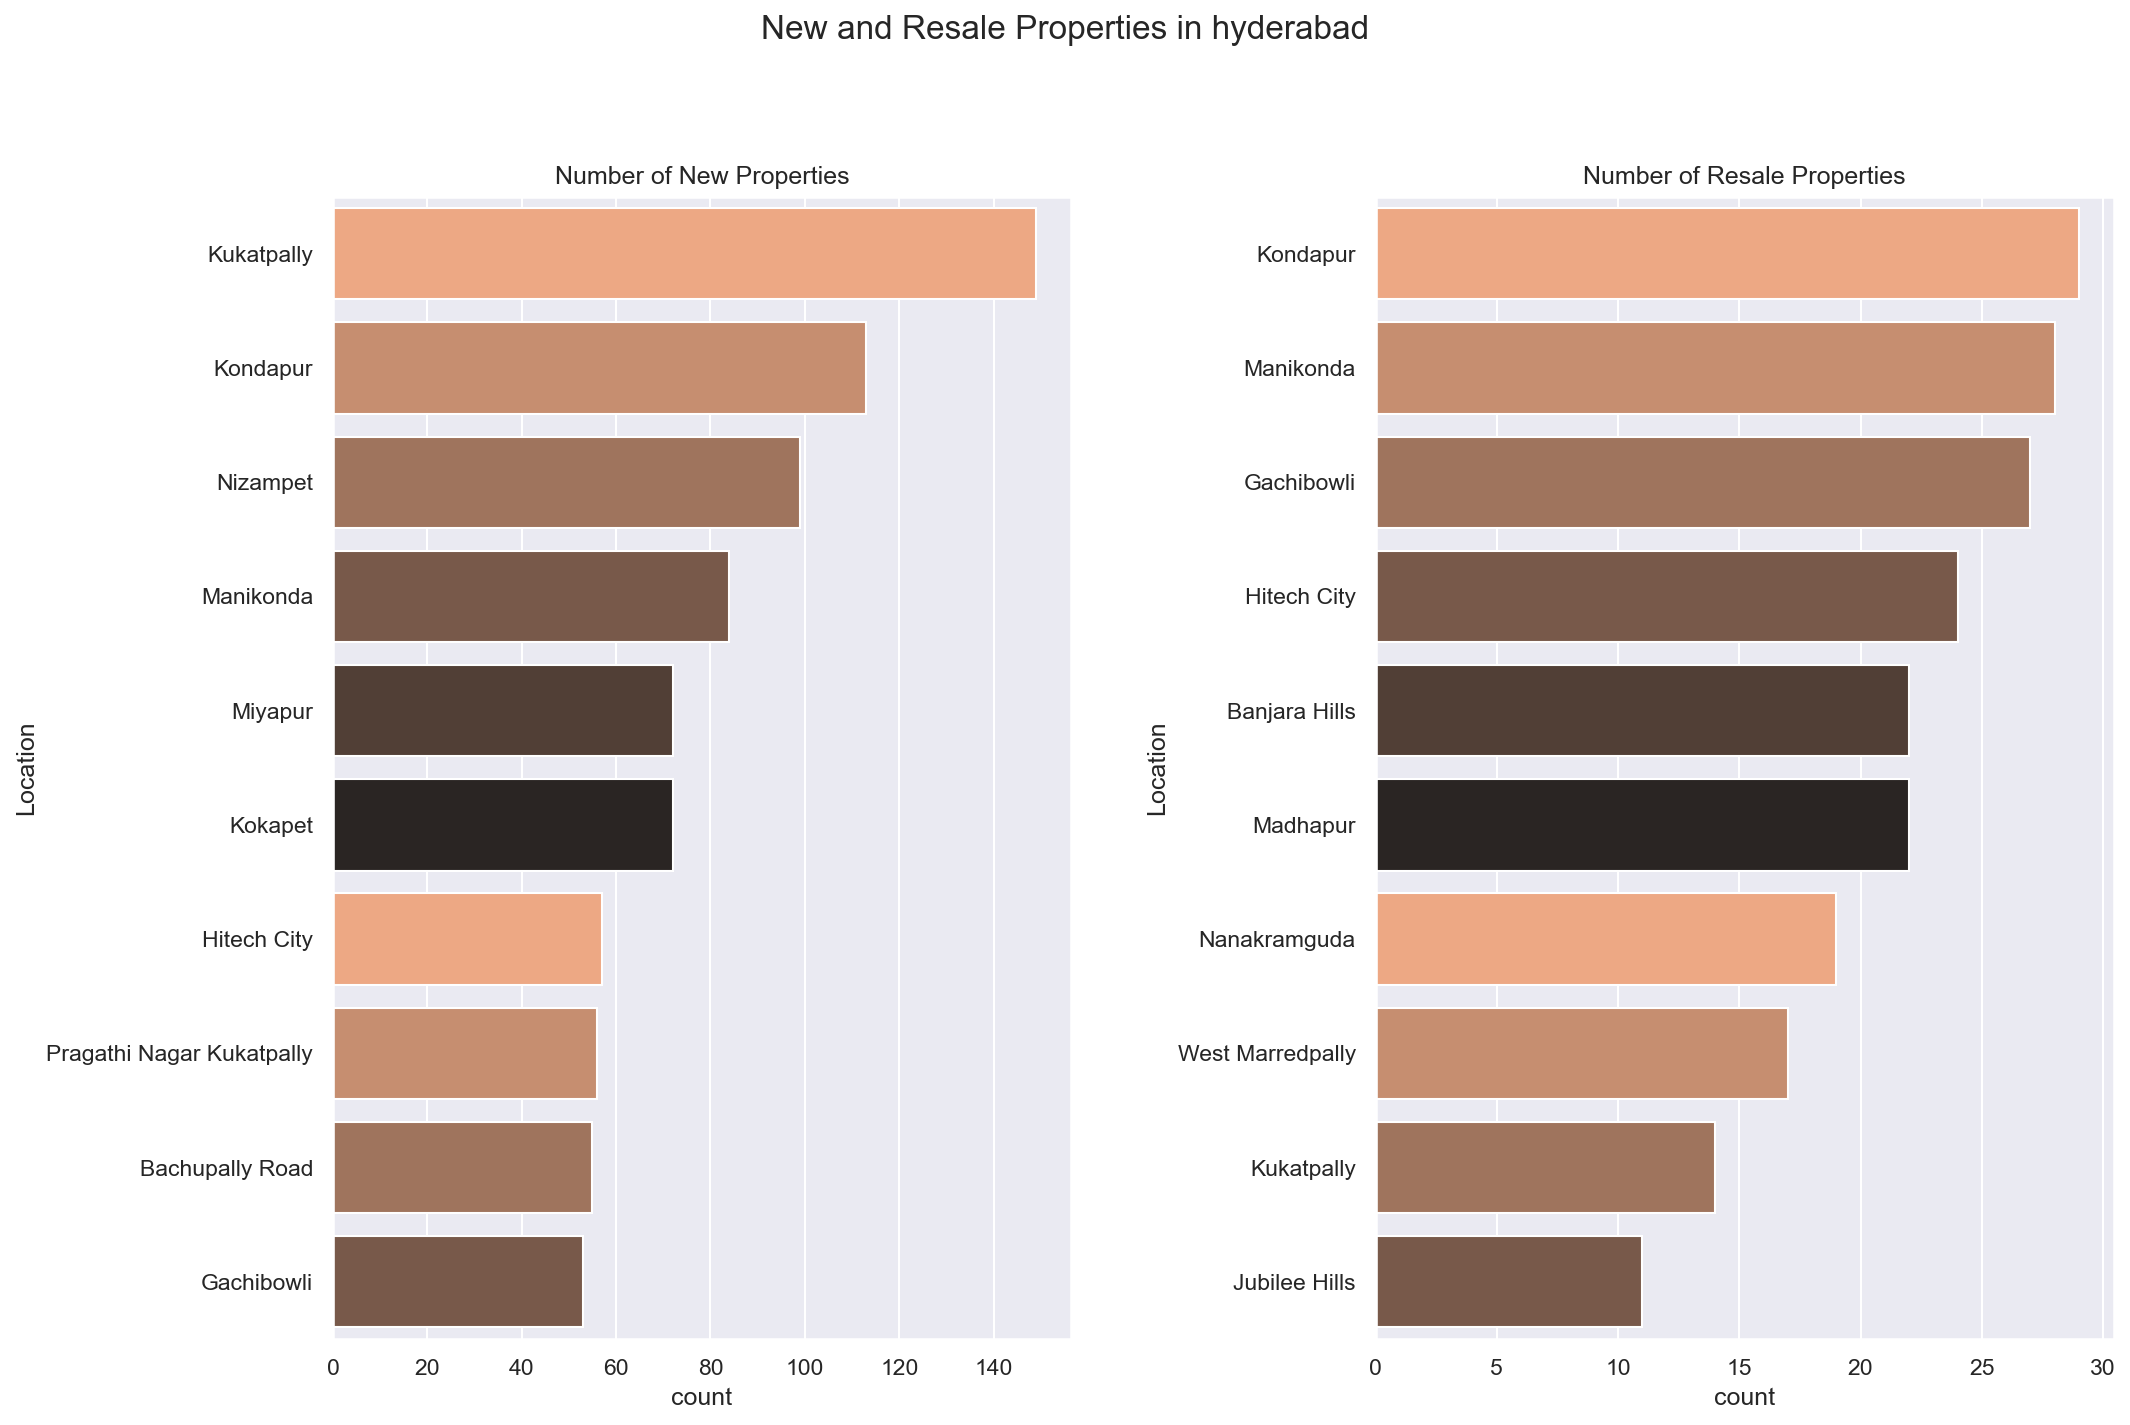

In [54]:
count_plot(df4,'New and Resale Properties in hyderabad',hyderabad)

In [55]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

In [56]:
def scatter_plot(data,title,c):
    sns.scatterplot(x='Area',y ='Price', data=data, color=c, marker='P')
    plt.title("Area in sq.ft Vs Price in " + title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

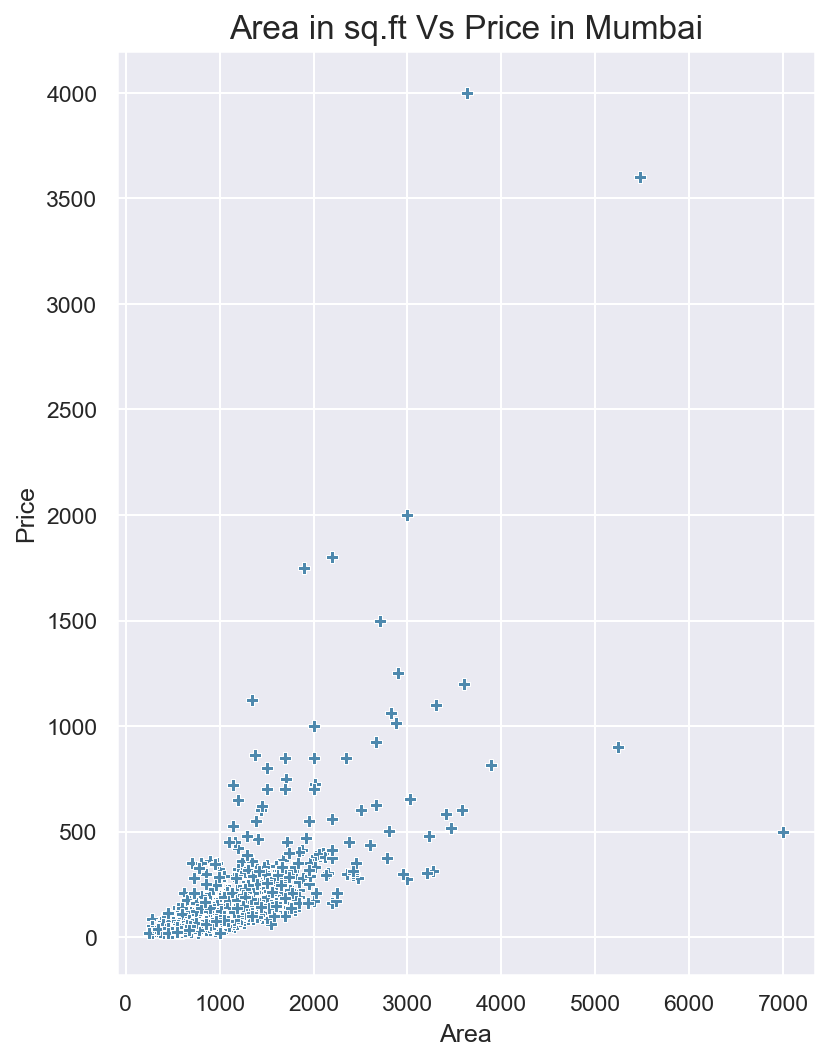

In [57]:
scatter_plot(df1,'Mumbai',custom_colors[0])

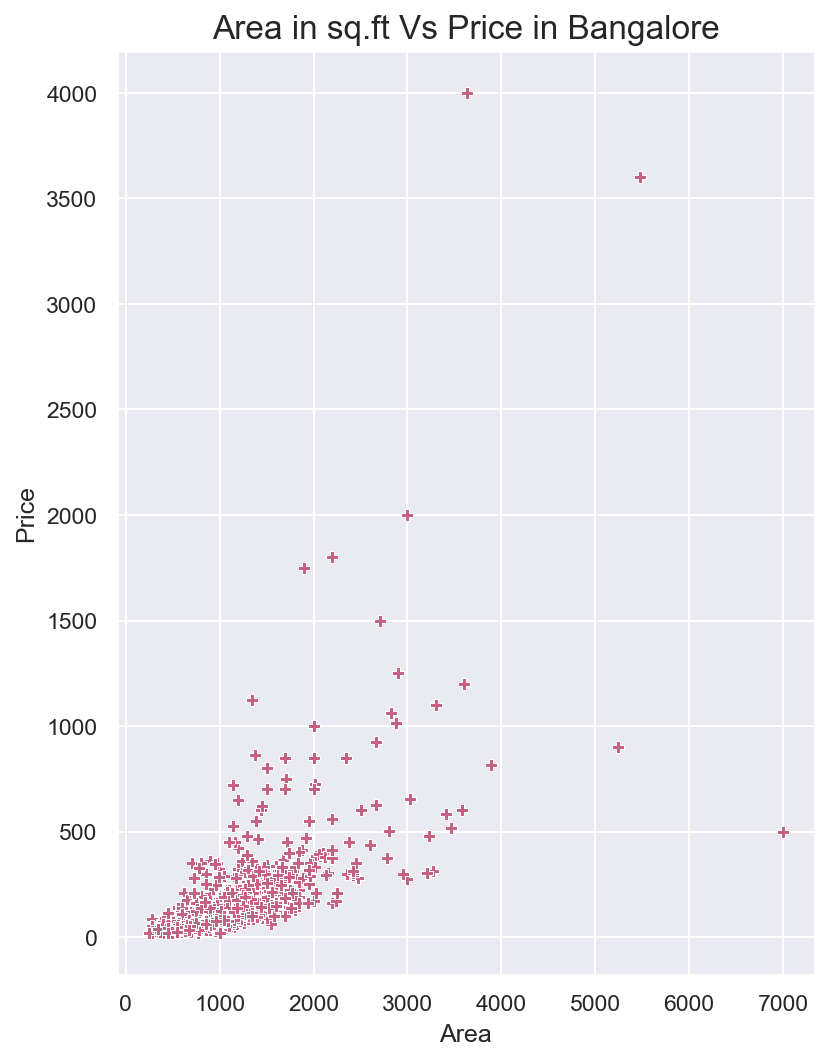

In [58]:
scatter_plot(df1,'Bangalore',custom_colors[1])

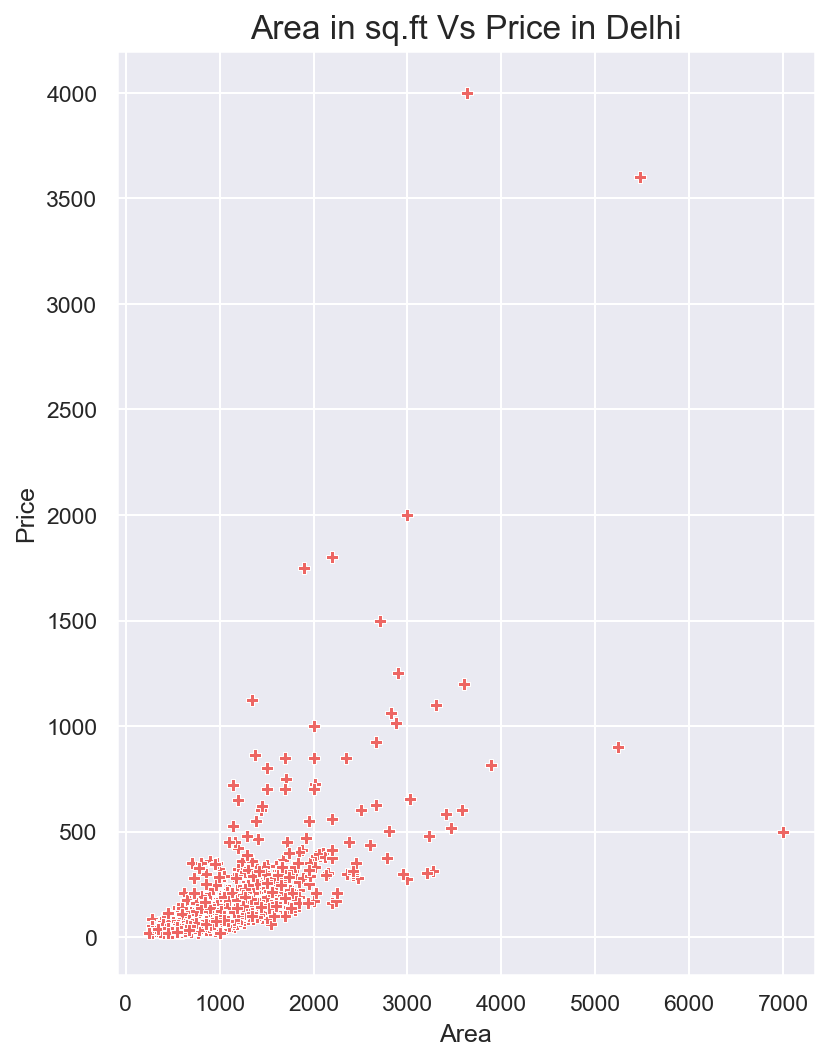

In [59]:
scatter_plot(df1,'Delhi',custom_colors[2])

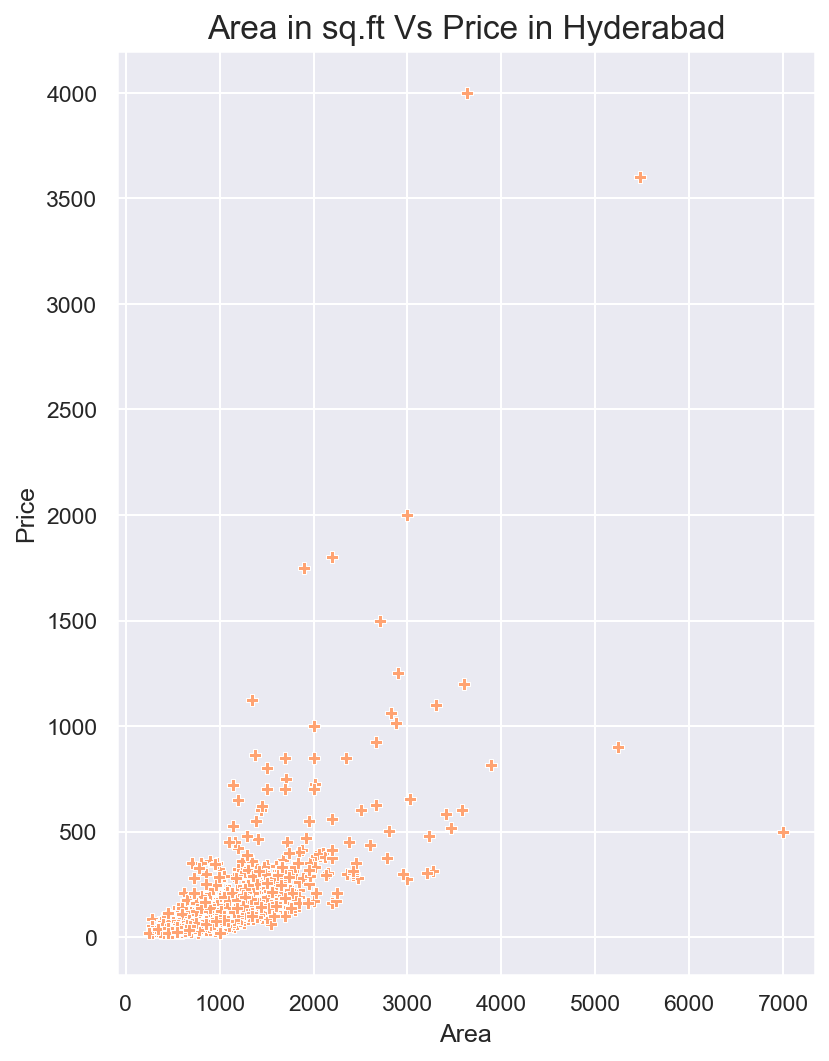

In [60]:
scatter_plot(df1,'Hyderabad',custom_colors[3])